In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bridgedatabase
import scipy as sp
import math as ma
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors, linear_model, naive_bayes, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.metrics import confusion_matrix # matrice de confusion
from sklearn.metrics import classification_report # rapports de classification



# Get data



Create bdb object


In [5]:
bd = bridgedatabase.bdb()

# Get bridge list in the database

In [6]:
bridge_list = bd.get_bridges()
num_bridges = bd.len()


Reading file Alge_Khemis El Afroun_PRA PB69142 SV_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PB69142_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PBP114+262_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PBP115_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PBP69DV_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PBP90_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PBP91_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA PBP92_PF6.xlsx
Reading file Alge_Khemis El Afroun_PRA116_PF6.xlsx
Reading file BPL_PRA CBA 0292_PF2.xlsx
Reading file BPL_PRA CBA 0476_PF2.xlsx
Reading file BPL_PRA CBA 0482_PF2.xlsx
Reading file BPL_PRA CBA 0491_PF2.xlsx
Reading file BPL_PRA CBA 0517_PF2.xlsx
Reading file BPL_PRA CBA 1544_PF2.xlsx
Reading file BPL_PRA CBA 1580_PF2.xlsx
Reading file BPL_PRA CBA 1589_PF2.xlsx
Reading file BPL_PRA CBA 1637_PF2.xlsx
Reading file BPL_PRA CBA 1672_PF2.xlsx
Reading file BPL_PRA CBA 1701_PF2.xlsx
Reading file BPL_PRA CBA 1784_PF2.xlsx
Reading file BPL_PRA CBA 1794_PF2.

In [7]:
print(bridge_list[0].keys())
print(bridge_list[0])
df=pd.DataFrame(bridge_list)
df.describe()

dict_keys(['filename', 'type', 'length', 'height_prof', 'travelage', 'obstacle_start', 'obstacle_end'])
{'filename': 'Alge_Khemis El Afroun_PRA PB69142 SV_PF6.xlsx', 'type': 'PF6', 'length': 36.0003, 'height_prof': [6.79619, 6.8818, 6.96741, 7.04412, 7.11626, 7.19228, 7.25934, 7.31744, 7.37041, 7.42338, 7.5648, 7.9046, 8.24423, 8.59451, 8.94569, 9.29812, 9.40976, 9.24105, 9.06734, 8.8922, 8.75765, 8.63782, 8.74459, 9.0863, 9.20993, 8.6663, 8.2538, 7.88357, 7.51335, 7.14313, 6.97595, 6.8698, 6.83674, 6.79783, 6.76151, 6.72758, 6.60866], 'travelage': [36.0003], 'obstacle_start': [2.22222], 'obstacle_end': [34.2219]}


,length
count,318.000000
mean,99.496069
std,183.282385
min,1.538330
25%,9.141810
50%,32.300000
75%,113.665000
max,1945.770000


In [8]:
plt.style.use('seaborn')

In [9]:
trav=df['travelage']
print(trav)

0                                              [36.0003]
1                                                   [26]
2                      [36.909, 74.725, 112.541, 149.45]
3                                                [53.73]
4                                                   [36]
                             ...                        
313                    [40, 95, 150, 205, 260, 300, 342]
314    [40, 95, 150, 205, 260, 300, 342, 405.6, 492.0...
315                                   [42, 82, 137, 177]
316    [37, 81.2, 128.2, 175.2, 222.2, 269.2, 316.2, ...
317                                            [52.9906]
Name: travelage, Length: 318, dtype: object


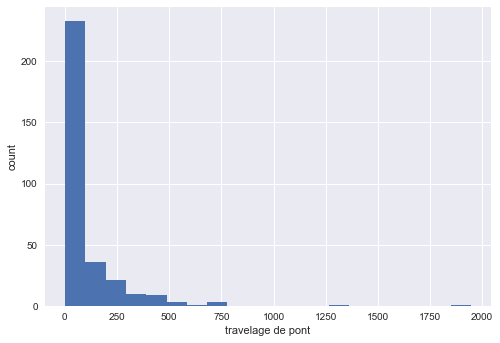

In [10]:
plt.hist(df["length"], bins=20)
plt.xlabel('travelage de pont')
plt.ylabel('count');

---
Bridge #2
Bridge length = 149.45 m
Number of points in height profile = 150


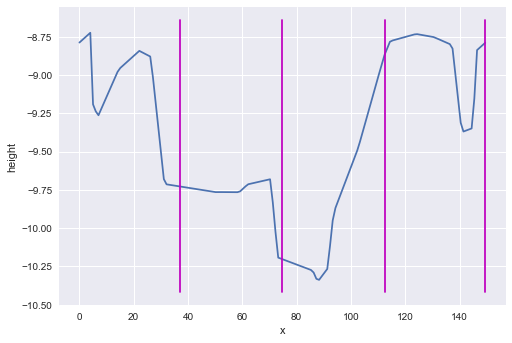

In [11]:
print('---')
ind = 2
print('Bridge #{0}'.format(ind))
bridge = bridge_list[ind]
length = bridge['length']
z = np.array(bridge['height_prof'])
n = z.shape[0]
x = np.linspace(0, length, n)
t = np.array(bridge['travelage'])

print('Bridge length = {0} m'.format(length))
print('Number of points in height profile = {0}'.format(n))

plt.plot(x, -z)
plt.xlabel('x')
plt.ylabel('height')
bottom, top = plt.ylim()
for i in range(t.shape[0]):
    plt.plot([t[i], t[i]], [bottom, top], 'm')

plt.show()


######################################
#

#
######################################



# Retrieve the list of lengths

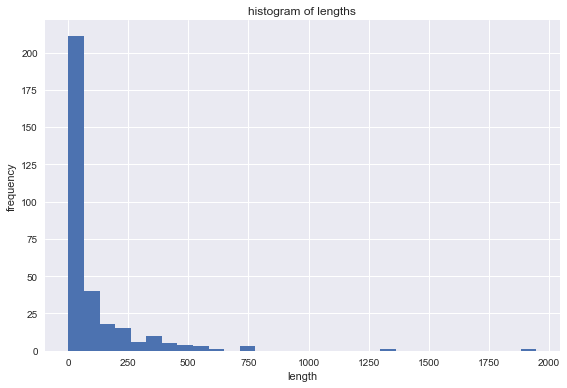

In [12]:
b_lengths = []
for i in range(num_bridges):
    b_lengths.append(bridge_list[i]['length'])

# Histogram of the lengths

num_bins = 30
fig, ax = plt.subplots()
n, bins, patches = ax.hist(b_lengths, num_bins)
plt.title('histogram of lengths')
plt.xlabel('length')
plt.ylabel('frequency')
fig.tight_layout()
plt.show()

# Number of bridges of each type

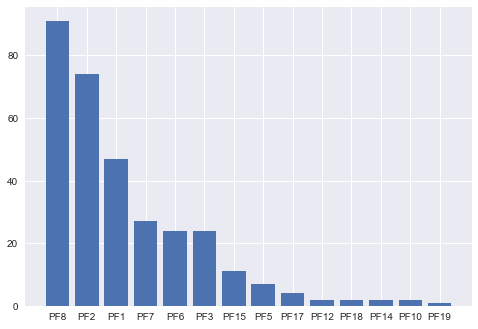

In [13]:
types_stats = {}
for i in range(num_bridges):
    type = bridge_list[i]['type']
    if type in types_stats:
        types_stats[type] += 1
    else:
        types_stats[type] = 1


types_stats_sorted = {k: v for k, v in sorted(types_stats.items(),
                                              key=lambda item: item[1],
                                              reverse=True)}

plt.bar(range(len(types_stats)), types_stats_sorted.values())
plt.xticks(range(len(types_stats)), types_stats_sorted.keys())
plt.show()

# Convert types to integers values and retrieve some stats in an np ndarray

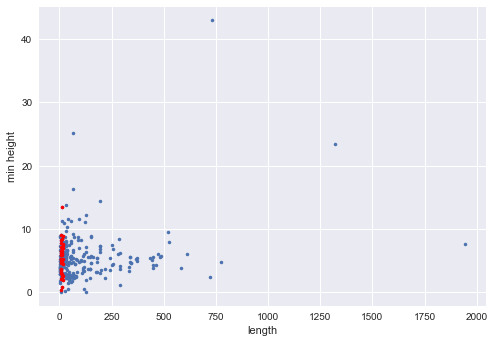

[[  6.       36.0003    6.60866   9.40976   1.     ]
 [  6.       26.        7.88186   9.85958   1.     ]
 [  6.      149.45      8.72451  10.3377    4.     ]
 ...
 [ 10.      177.        3.13795  13.4034    4.     ]
 [ 15.      447.2       3.882    28.738    10.     ]
 [ 17.       52.9906    5.56468   7.01801   1.     ]]
[ 1.  1.  4.  1.  1.  1.  9.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  3.  5.  3.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  1.  1.  5.  3.  8.  3.  9.  7.  9.  1.  1.
  1.  2.  2.  1.  2.  1.  1.  1.  1.  5.  5.  4.  8.  1.  3.  2.  2.  1.
  2.  1.  1. 14.  7.  5.  1.  2.  3.  1.  2.  1.  1.  1.  4.  2.  3.  2.
  3.  8.  1.  1.  5.  1.  4.  2.  7.  5.  5.  6.  5.  2.  1.  3.  2.  1.
  2.  4.  2.  2.  4.  1.  2.  2. 11.  6.  5. 12. 15.  6.  3.  3.  8.  4.
  8.  4.  8.  5.  5. 13. 31.  1. 17. 49.  1.  4.  4.  1.  1.  2.  1.  1.
  1.  1.  1.  3.  1.  3.  1.  4.  1.  6.  1.  4.  2.  1.  1.  6.  6.  9.
 12.  5.  2.  2.  4

In [14]:
X = np.ndarray([num_bridges, 5])
for i in range(num_bridges):
    type = bridge_list[i]['type']
    X[i, 0] = int(type[2:])
    X[i, 1] = bridge_list[i]['length']
    X[i, 2] = np.min(np.array(bridge_list[i]['height_prof']))
    X[i, 3] = np.max(np.array(bridge_list[i]['height_prof']))
    X[i, 4] = len(bridge_list[i]['travelage'])
    
plt.plot(X[:, 1], X[:, 2], '.')
plt.xlabel('length')
plt.ylabel('min height')
dff=pd.DataFrame(X,columns=['type','length','min_height','max_height','travelage'])

indices = np.where(X[:, 0] == 1)
plt.plot(X[indices[0], 1], X[indices[0], 2], '.', color='r')

plt.show()
print(X)
print(X[:,4])

# correlation longueur - travelage


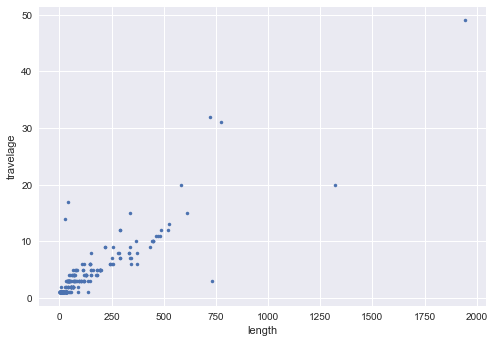

In [15]:
plt.plot(X[:, 1], X[:, 4], '.')
plt.xlabel('length')
plt.ylabel('travelage')
plt.show()


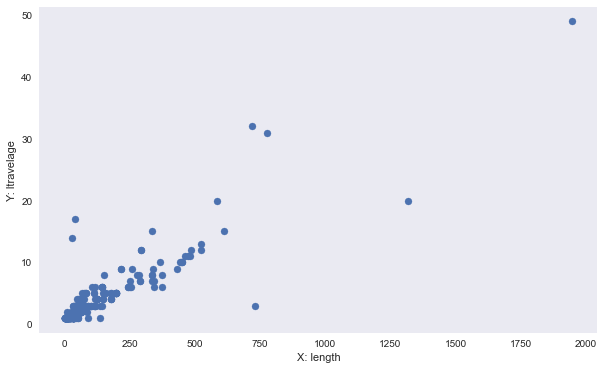

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 1], X[:, 4])
plt.xlabel("X: length")
plt.ylabel("Y: ltravelage")
plt.grid()

In [17]:
Xi = dff['length']
Xi = sm.add_constant(Xi)  # add the intercept term => necessary with statsmodels regression
y = dff['travelage']
ols = sm.OLS(y, Xi).fit()

ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              travelage   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1236.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          3.10e-111
Time:                        10:23:48   Log-Likelihood:                -690.63
No. Observations:                 318   AIC:                             1385.
Df Residuals:                     316   BIC:                             1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0787      0.136      7.935      0.000       0.811       1.346
length         0.0229      0.001     35.157      0.000       0.022       0.024
==============================================================================
Omnibus:                      207.465   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11393.819
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      32.066   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'R^2 = 0.80')

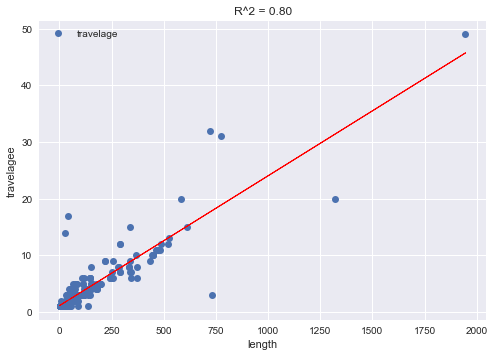

In [18]:
fig = dff.plot(x="length", y="travelage", style="o")
fig.set_ylabel("travelagee")
ypred = ols.predict(Xi)
fig.plot(dff['length'], ypred, 'r', linewidth=1)
fig.set_title('R^2 = {:.2f}'.format(ols.rsquared))

La valeur du $R^2$ est plutôt élevée  ($R^2 = 0.80$) ce qui confirme une bonne relation linéaire entre travelage et length.

In [19]:
residuals = y - ypred
print(residuals)
fig = sm.qqplot(residuals, dist="norm", line="r")

0      -0.904750
1      -0.675297
2      -0.507809
3      -1.311551
4      -0.904743
         ...    
313    -1.925793
314   -11.342676
315    -1.139933
316    -1.339566
317    -1.294585
Length: 318, dtype: float64


AttributeError: 'str' object has no attribute 'name'

In [20]:
#X_train, X_test, y_train, y_test = np.transpose(np.array(X[:,1:])),np.transpose(np.array(X[:,1:])),np.transpose(X[:,0]),np.transpose(X[:,0])
data = X
#X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.2, random_state=42)
import datatable as dt
import numpy as np
from sklearn.model_selection import train_test_split

print(data[:, 0])


X_train, X_test, y_train, y_test = train_test_split(data[:, 1:], data[:, 0], test_size=0.2)


print("Dimension of the complete dataset (%0.0f, %0.0f):" % (data.shape[0], data.shape[1]))
print("Dimension of the train set (%0.0f, %0.0f):" % (X_train.shape[0], X_train.shape[1]))
print("Dimension of the test set (%0.0f, %0.0f):" % (X_test.shape[0], X_test.shape[1]))

[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  8.  8.  5.  3.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. 17. 17.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  6. 15. 15. 15.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6. 19. 12. 18.  7.  7.  7.  7.  1.  3.  2.  2.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  1.  7.  7.  7.
  7.  7.  3.  3.  3.  8.  8.  2.  2.  2.  3.  1.  2.  1.  3.  2.  2.  3.
  3.  2.  2.  3.  3.  2.  1.  2.  1.  3.  2.  3.  3.  2.  2.  3.  1.  1.
  3.  3.  3.  1.  5.  2.  2.  7.  2.  3.  1.  2.  2.  7.  3.  1.  1.  2.
  2.  2. 18.  5.  5.  5.  5. 12.  6. 17. 14.  7.  6.  6.  2.  1.  2.  1.
  2.  1.  1.  1.  2.  1.  3.  1.  1.  2.  1.  2.  2

# The nearest neighbor classification

In [38]:

X, y = data[:, 1:], data[:, 0]

X_train, X_test, y_train, y_test = train_test_split(data[:, 1:], data[:, 0], test_size=0.2)

knn = neighbors.KNeighborsClassifier(n_neighbors=1) 
scores = cross_val_score(knn,X_train,y_train,cv=2,error_score='raise')
print("score moyen de validation croisée: %0.3f (+/- %0.3f)" % (scores.mean(),2*scores.std()))
# la prédiction d'une nouvelle observation consistera à chercher le p.p.v. dans X_train, 
# et à associer la classe de ce p.p.v., donnée par y_train:
knn.fit(X_train,y_train)  
# Remarque: il n'y a pas d'apprentissage à proprement parler pour les p.p.v., 
# il s'agit juste de préciser la base dans laquelle seront cherchés les plus proches voisins

# on stocke dans y_pred les classes prédites sur un ensemble de test X_test:
y_pred = knn.predict(X_test)  

# calcul d'un score lorsqu'on connaît les vraies classes des observations de X_test: 
# (proportion d'observations pour lesquelles y_test==y_pred)
score = knn.score(X_test,y_test)

score moyen de validation croisée: 0.508 (+/- 0.008)


c:\Users\Marouane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.



In [29]:
import plotly.graph_objects as go

In [30]:

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

C:\Users\Marouane\AppData\Local\Temp/ipykernel_10904/1286944595.py:10: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [49]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data


# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>accuracy'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [47]:
print(X_test)

[[3.33098e+00 3.92565e+00 3.94725e+00 1.00000e+00]
 [1.45600e+02 5.59416e+00 2.49997e+01 3.00000e+00]
 [6.60000e+01 2.32916e+00 6.85109e+00 5.00000e+00]
 [1.03400e+02 8.19092e+00 9.40698e+00 3.00000e+00]
 [2.89000e+02 6.20364e+00 3.54535e+01 7.00000e+00]
 [3.80000e+01 6.57193e+00 7.38527e+00 1.00000e+00]
 [9.40000e+00 2.04617e+00 2.07796e+00 1.00000e+00]
 [2.06000e+01 6.99702e+00 8.46629e+00 1.00000e+00]
 [4.43000e+01 2.76440e+00 7.63538e+00 3.00000e+00]
 [6.80000e+00 5.96018e-03 1.65981e-01 1.00000e+00]
 [3.74000e+02 5.32899e+00 2.12796e+01 8.00000e+00]
 [4.63321e+01 2.40907e+00 9.14766e+00 3.00000e+00]
 [2.51250e+02 4.22870e+00 1.14359e+01 6.00000e+00]
 [2.47300e+01 3.05553e+00 3.95394e+00 1.00000e+00]
 [8.10112e+00 5.70296e+00 6.33524e+00 1.00000e+00]
 [5.92899e+01 1.78472e+00 6.07348e+00 4.00000e+00]
 [1.65200e+01 4.52752e+00 6.08340e+00 1.00000e+00]
 [7.15000e+00 6.67998e+00 6.76091e+00 1.00000e+00]
 [1.26600e+02 1.91018e+00 4.31658e+01 4.00000e+00]
 [4.45000e+01 4.82636e+00 5.244

## Linear Discriminant Analysis

In [ ]:
# fit of the lda model
clf = lda()

In [ ]:
score_cv = cross_val_score(clf, X_train, y_train, cv=5)
print("score on each fold:")
print()
print(score_cv)
print("average cross validated score: %0.3f (+/- %0.3f)" % (score_cv.mean(),2*score_cv.std()))

score on each fold:

[0.52941176 0.45098039 0.43137255 0.49019608 0.54      ]
average cross validated score: 0.488 (+/- 0.085)


c:\Users\Marouane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# fit of the lda model from the train set
clf.fit(X_train,y_train)  

# Computation of the score obtained on the test set (when the true label is known)
score = clf.score(X_test, y_test)
print("Accuracy of the model on the test set: %0.3f" % score)

Accuracy of the model on the test set: 0.328


In [ ]:
# y_pred contains the predicted classes of the test set X_test:
y_pred = clf.predict(X_test) 

pred=clf.predict([[1200,7,34.6,104]])
print('The type of bridge is :'pred)

print('the confusion matrix is :'confusion_matrix(y_test, y_pred))


[12.]
[[ 0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]]
[ 2. 12.  8. 14.  2.  2.  2.  8.  2.  2.  2.  8.  8.  2.  2.  2.  2.  8.
  8. 15.  8.  2.  2.  8.  7.  2.  8.  2.  2.  8.  6.  3.  8.  2. 18.  3.
  8.  8.  2.  2.  2.  2.  2.  8.  8.  2.  8.  2.  2.  2.  8.  8.  3.  2.
  8.  2.  2. 15.  3.  3. 15.  2.  6.  8.]


In [ ]:
import statistics
m=[]

for k in range(len(data)):
    if data[k,0]==12:
        m.append(data[k,1]/data[k,4])
mean = statistics.mean(m)
print('nombre de piles :',mean)


nombre de piles : 15.014329411764706


In [ ]:
target_names = ['1','2','3','4','5','6','7','8','9','10','11']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.26      0.91      0.41        11
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         2
           5       0.40      0.25      0.31         8
           6       0.00      0.00      0.00         8
           7       0.55      0.35      0.43        17
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.50      1.00      0.67         2
          11       0.00      0.00      0.00         2

    accuracy                           0.33        64
   macro avg       0.20      0.27      0.21        64
weighted avg       0.27      0.33      0.26        64



c:\Users\Marouane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marouane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marouane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m